# 0. Chargement du dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import plotly.express as px
import sort_dataframeby_monthorweek as sd

#NLP packages
from textblob import TextBlob

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 25)
df= pd.read_csv('Datafiniti_Hotel_Reviews.csv', sep=',')

# 1. Exploration et préparation des données

In [31]:
df

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reservations,Resorts,Resort,Hotel",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,-117.186136,Rancho Valencia Resort Spa,92067,CA,2013-11-14T00:00:00Z,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016-08-02T00:00:00Z,2016-07-17T00:00:00Z,2016-08-27T00:00:00Z,2016-08-23T00:00:00Z,2016-08-09T00:00:00Z,2016-11-07T00:00:00Z,2016-08-26T00:00:00Z",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolutely perfect from beginning to end!!!! We felt special and very happy during our stayed. I would come back in a heart beat!!!,Best romantic vacation ever!!!!,NaN,NaN,Paula,"http://www.hotels.com/ho125419/%25252525253Flocale%25252525253Den_US%252525252526pos%25252525253DHCOM_US,http://www.yellowbook.com/profile/rancho-valencia-resort-and-spa_1895174051.html,https://www.hotels.com/hotel/125419/reviews%20/,https://foursquare.com/v/rancho-valencia-resort--spa/4aaedb79f964a5208f6320e3,http://www.gayot.com/Hotels/Select-Your-City/United-States/California/San-Diego/Rancho-Valencia-Resort-Spa-Rancho-Santa-Fe-SDHOT02319-02",http://www.ranchovalencia.com
1,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reservations,Resorts,Resort,Hotel",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,-117.186136,Rancho Valencia Resort Spa,92067,CA,2014-07-06T00:00:00Z,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016-08-03T00:00:00Z,2016-07-17T00:00:00Z,2016-08-09T00:00:00Z,2016-08-23T00:00:00Z,2016-08-27T00:00:00Z,2016-11-15T00:00:00Z,2016-07-26T00:00:00Z",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and welcoming. We've stayed at some top notch places and this is definitely in our top 2. Great for a romantic getaway or take the kids along as we did. Had a couple stuffed animals waiting for our girls upon arrival. Can't wait to go back.,Sweet sweet serenity,NaN,NaN,D,"http://www.hotels.com/ho125419/%25252525253Flocale%25252525253Den_US%252525252526pos%25252525253DHCOM_US,http://www.yellowbook.com/profile/rancho-valencia-resort-and-spa_1895174051.html,https://www.hotels.com/hotel/125419/reviews%20/,https://foursquare.com/v/rancho-valencia-resort--spa/4aaedb79f964a5208f6320e3,http://www.gayot.com/Hotels/Select-Your-City/United-States/California/San-Diego/Rancho-Valencia-Resort-Spa-Rancho-Santa-Fe-SDHOT02319-02",http://www.ranchovalencia.com
2,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reservations,Resorts,Resort,Hotel",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,-117.186136,Rancho Valencia Resort Spa,92067,CA,2015-01-02T00:00:00Z,"2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016-08-27T00:00:00Z,2016-07-26T00:00:00Z,2016-08-02T00:00:00Z,2016-07-17T00:00:00Z,2016-08-03T00:00:00Z,2016-08-09T00:00:00Z,2016-08-26T00:00:00Z",5.0,https://www.hotels.com/hotel/125419/reviews%20/,"We booked a 3 night stay at Rancho Valencia to play some tennis, since it is one of the highest rated tennis resorts in America. This place is really over the top from a luxury standpoint and overall experience. The villas are really perfect, the staff is great, attention to details (includes fresh squeezed orange juice each morning), restaurants, bar and room service amazing, and the tennis program was really impressive as well. We will want to come back here again.",Amazing Pro

In [6]:
# Afficher les informations sur le DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  object 
 1   dateAdded             10000 non-null  object 
 2   dateUpdated           10000 non-null  object 
 3   address               10000 non-null  object 
 4   categories            10000 non-null  object 
 5   primaryCategories     10000 non-null  object 
 6   city                  10000 non-null  object 
 7   country               10000 non-null  object 
 8   keys                  10000 non-null  object 
 9   latitude              10000 non-null  float64
 10  longitude             10000 non-null  float64
 11  name                  10000 non-null  object 
 12  postalCode            10000 non-null  object 
 13  province              10000 non-null  object 
 14  reviews.date          10000 non-null  object 
 15  reviews.dateSeen    

In [7]:
#Nombre de lignes
print("Nombre de lignes :", df.shape[0], "\n")

#Nombre de colonnes
print("Nombre de colonnes :", df.shape[1], "\n")

Nombre de lignes : 10000 

Nombre de colonnes : 25 



In [8]:
# Affichage des colonnes
print(df.columns, "\n")

Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'country', 'keys', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateSeen',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username',
       'sourceURLs', 'websites'],
      dtype='object') 



# 2. Nettoyage des Données

## 2.1. Identification des doublons

In [3]:
# Lignes en double
doublons = df.duplicated().sum()
print("\nNombre de lignes en double (à l'exclusion de l'ID):", doublons)

# 0


Nombre de lignes en double (à l'exclusion de l'ID): 0


## 2.2. Gestion des Valeurs Nulles

In [3]:
# Identifier les valeurs nulles et leur pourcentage
val_null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
val_null

,Null Values,Percentage Null Values
id,0,0.00
dateAdded,0,0.00
dateUpdated,0,0.00
address,0,0.00
categories,0,0.00
primaryCategories,0,0.00
city,0,0.00
country,0,0.00
keys,0,0.00
latitude,0,0.00


In [4]:
# Remplacer les valeurs nulles par "NULL" pour une colonne spécifique
df['reviews.userCity'].fillna("NULL", inplace=True)
df['reviews.userProvince'].fillna("NULL", inplace=True)

# Remplacer les valeurs nulles par les valeurs les plus fréquentes
df['reviews.userCity'] = df['reviews.userCity'].fillna(df['reviews.userCity'].mode()[0])
df['reviews.userProvince'] = df['reviews.userProvince'].fillna(df['reviews.userProvince'].mode()[0])

C:\Users\Mossab Weda\AppData\Local\Temp\ipykernel_19324\3525275403.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews.userCity'].fillna("NULL", inplace=True)
C:\Users\Mossab Weda\AppData\Local\Temp\ipykernel_19324\3525275403.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

## 2.3. Suppression de Colonnes et Lignes Inutiles

In [5]:
# Colonnes presque vides
colonnes_presque_vides = [colonne for colonne in df.columns if df[colonne].isnull().sum() >= 0.9 * len(df)]
print("Colonnes (presque) vides et pouvant être supprimées:",colonnes_presque_vides)

Colonnes (presque) vides et pouvant être supprimées: []


# 3. Analyse Sentimentale

In [5]:
# Tester TextBlob
TextBlob("The movie is good").sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

## 3.1. Calcul de la polarité des sentiments

### Polarité
- Plage de valeurs : La polarité varie entre -1 et 1.
- Interprétation : Un score de polarité de -1 indique un sentiment très négatif, tandis qu'un score de 1 indique un sentiment très positif. Un score de 0 indique un sentiment neutre ou indifférent. 

### Subjectivité
- Plage de valeurs : La subjectivité varie entre 0 et 1.
- Interprétation : Un score de subjectivité de 0 indique que le texte est très objectif, basé sur des faits et des informations factuelles. Un score de 1 indique que le texte est très subjectif, basé sur des opinions personnelles plutôt que sur des faits. La subjectivité est calculée en examinant l'intensité des mots dans le texte, notamment en utilisant des adverbes comme des modificateurs (par exemple, "très bon").

In [6]:
polarity=[] # Liste qui contiendra la polarité des commentaires
subjectivity=[] # Liste qui contiendra la subjectivité des commentaires

for i in df['reviews.text'].values:
    try:
        # Analyser le sentiment du commentaire avec TextBlob
        analysis = TextBlob(i)

        polarity.append(analysis.sentiment.polarity)
        subjectivity.append(analysis.sentiment.subjectivity)
        
    except:
        polarity.append(0)
        subjectivity.append(0)

In [7]:
# Ajouter les colonnes polarity et subjectivity au DF
df['polarity'] = polarity
df['subjectivity'] = subjectivity

### 3.1.1. Comentaires Négatives

In [8]:
pd.set_option('display.max_colwidth', 1000)

# Calcul du nombre total de commentaires
total_comments = df.shape[0]

# Calcul du nombre de commentaires négatifs
negative_comments = df[df['polarity'] < 0].shape[0]

# Calcul du pourcentage de commentaires négatifs
percentage_negative = (negative_comments / total_comments) * 100

print(f"Nombre total de commentaires : {total_comments}")
print(f"Nombre de commentaires négatifs : {negative_comments}")
print(f"Pourcentage de commentaires négatifs : {percentage_negative:.2f}% \n\n")

# Affichage des commentaires négatives
print("Commentaires négtavies :")
df[['name','reviews.text','polarity','subjectivity','reviews.rating']][df.polarity<0].head(10)

Nombre total de commentaires : 10000
Nombre de commentaires négatifs : 960
Pourcentage de commentaires négatifs : 9.60% 


Commentaires négtavies :


,name,reviews.text,polarity,subjectivity,reviews.rating
3,Aloft Arundel Mills,Currently in bed writing this for the past hr 1/2 there have been dogs barking and squealing call the front desk to advise basically to be told there's nothing they can do. 315.00 and I can't sleep.,-0.125000,0.325000,2.00
30,Hampton Inn Suites National HarborAlexandria Area,"heat in room did not work properly, tv remote was broken excessive noise",-0.250000,0.533333,2.00
31,Hampton Inn Suites National HarborAlexandria Area,"Even though we were having problems, i.e. Feather allergy, Flat tire, key not working...the front desk personell were always gracious and helpful.",-0.012500,0.562500,5.00
45,Hampton Inn Suites National HarborAlexandria Area,I was really disappointed with the TV service. Very few channels and poor quality.,-0.470000,0.493333,3.00
69,Fairmont Grand Del Mar,"Expensive Yes. Service Above the norm! Nickel and dime you on the small stuff Nope! (one of my pet peeves if you are going to stay at a hotel of this caliber) This property gives you 5 star service. Forgot your work out clothes Let the staff know your size. Need some feminine products, be there in 5 minutes. The... More",-0.078125,0.425000,5.00
77,Best Western at OHare,Average hotel for decent price. It was balanced. Housekeeping did leave our door only ajar after cleaning one day. Arrrggghhhh!!!!! Nothing was missing.,-0.045833,0.529167,3.00
78,Best Western at OHare,The room key did not work i to go to lobby 4 times no parking under heavy construction noise the staff very incompetent I will not come back to this hotel,-0.163750,0.494167,3.00
85,Virgin Hotels Chicago,Bad: The room rate was terrible we had a Booking.com rate that was not honoured it soured the stay and was a big difference. We to date have no explanation!. Good: Location,-0.260000,0.493333,3.55
94,Virgin Hotels Chicago,"Bad: Intermittent barking dog!. Good: Spacious suite, recommend end room on high floor",-0.005000,0.602222,4.80
101,The Boxer,Bad: I was supposed to get a room with two beds and ended up with a room with one full bed for me and my husband.it was very small!.,-0.252083,0.578889,4.15


### 3.1.2. Comentaires Positives

In [9]:
pd.set_option('display.max_colwidth', 1000)

# Calcul du nombre de commentaires positives
positives_comments = df[df['polarity'] > 0].shape[0]

# Calcul du pourcentage de commentaires négatifs
percentage_positives = (positives_comments / total_comments) * 100

print(f"Nombre de commentaires négatifs : {positives_comments}")
print(f"Pourcentage de commentaires négatifs : {percentage_positives:.2f}% \n\n")

# Affichage des commentaires positives
print("Commentaires positives :")
df[['name','reviews.text','polarity','subjectivity','reviews.rating']][df.polarity>0].head(10)

Nombre de commentaires négatifs : 8917
Pourcentage de commentaires négatifs : 89.17% 


Commentaires positives :


,name,reviews.text,polarity,subjectivity,reviews.rating
0,Rancho Valencia Resort Spa,Our experience at Rancho Valencia was absolutely perfect from beginning to end!!!! We felt special and very happy during our stayed. I would come back in a heart beat!!!,0.589286,0.642857,5.0
1,Rancho Valencia Resort Spa,Amazing place. Everyone was extremely warm and welcoming. We've stayed at some top notch places and this is definitely in our top 2. Great for a romantic getaway or take the kids along as we did. Had a couple stuffed animals waiting for our girls upon arrival. Can't wait to go back.,0.375000,0.531250,5.0
2,Rancho Valencia Resort Spa,"We booked a 3 night stay at Rancho Valencia to play some tennis, since it is one of the highest rated tennis resorts in America. This place is really over the top from a luxury standpoint and overall experience. The villas are really perfect, the staff is great, attention to details (includes fresh squeezed orange juice each morning), restaurants, bar and room service amazing, and the tennis program was really impressive as well. We will want to come back here again.",0.488889,0.538889,5.0
4,Aloft Arundel Mills,I live in Md and the Aloft is my Home away from home...we stayed 1 night 7-7-16 ...Staff is great ! Especially Olivia who was Extra special because she remembered me by my voice over the phone ...which tells me she is very alert and pays attention to the customer their needs.AND SHE DID ! Thumbs up... More,0.320501,0.531633,5.0
5,Aloft Arundel Mills,"I stayed here with my family for my daughters wedding. It had a very accommodating staff, Olivia was excellent. The rooms were very well maintained. Would highly recommend this hotel, especially if your wedding venue is Celebrations at the Bay!",0.312000,0.628000,5.0
6,Aloft Arundel Mills,"Beautiful rooms and the nicest people working there. The front desk lady, Olivia, was extremely patient and helpful. We had lots of questions and she had just as many answers. The rooms were sleek and modern. The only thing that would make this hotel better would be free breakfast, but I really am asking for a lot. A++ stay. Thank... More",0.336111,0.644444,5.0
7,Aloft Arundel Mills,"We stayed here while visiting Maryland Live!. Cute hotel in a great location. Clean, with a very modern look, upgraded bathrooms and amenities and super nice staff. Would definitely recommend and stay there again!",0.378807,0.688333,5.0
8,Aloft Arundel Mills,"I travel a lot with my job, so I'm constantly staying at hotels. When my co-workers and I arrived late last night at the Aloft the people at the front desk were more than welcoming. When I wanted to order room service I was told it was too late however, Olivia at the front desk informed me of a Italian... More",0.057143,0.371429,5.0
9,Hampton Inn Suites PortlandVancouver,"In my line of work, I use meeting space in hotels often. In my 15+ years of doing this work, this is the first time I've felt the undeniable pull to go out and write a hotel review, based solely on my meeting room experience. Though I did not use a guest room here, my colleagues who did shared that... More",0.375000,0.416667,5.0
10,Hampton Inn Suites PortlandVancouver,"The staff is very friendly and helpful. The rooms are large and nicely furnished. Feels new, as if we were the first to stay there. Actually it is more opulent than I require. The free breakfast was good with sufficient choices including fresh fruit salad, eggs, bacon, bagels and pastries and more. It was a great location for our purpose:... More",0.449012,0.584704,5.0


### 3.1.3. Commentaires Neutres

In [10]:
pd.set_option('display.max_colwidth', 1000)
# Calcul du nombre de commentaires positives
neutre_comments = df[df['polarity'] == 0].shape[0]

# Calcul du pourcentage de commentaires négatifs
percentage_neutre = (neutre_comments / total_comments) * 100

print(f"Nombre de commentaires négatifs : {neutre_comments}")
print(f"Pourcentage de commentaires négatifs : {percentage_neutre:.2f}% \n\n")

# Affichage des commentaires positives
print("Commentaires neutres :")
df[['name','reviews.text','polarity','subjectivity','reviews.rating']][df.polarity==0].head(10)

Nombre de commentaires négatifs : 123
Pourcentage de commentaires négatifs : 1.23% 


Commentaires neutres :


,name,reviews.text,polarity,subjectivity,reviews.rating
112,The Boxer,The location,0.0,0.0,5.00
653,W Boston,Dated... The room,0.0,0.0,3.55
691,W Boston,Big room,0.0,0.1,5.00
1300,Holiday Inn North Phoenix,This hotel has bedbugs!! The staff acted like it wasn't a big idea!! Don't stay here!!,0.0,0.1,1.00
1305,Holiday Inn North Phoenix,I like it,0.0,0.0,4.00
1569,Best Western Courtesy Inn,Stayed there to be close to downtown disney,0.0,0.0,4.00
1588,Pacific Inn,"We had difficulty finding this motel. It is closer to Knott's Berry Farm over Disneyland. The check in lobby smelled of urine. The hotel does not have a lift of any sort for the second floor, therefore consider this if climbing stairs is an issue....More",0.0,0.0,2.00
1996,Clarion Inn & Suites,Met our expectations.,0.0,0.0,3.00
2551,Hampton Inn-athens,"although the initial nonsmoking room selected on line was found to have the lingering smell of smokers, the front desk staff did not hesitate to relocate us to a similar room that met our expectations. no hassles.",0.0,0.2,4.00
2689,Baymont Inn & Suites Bowling Green,"Room smelled musty, carpets and bedding had a sticky feel. Pool out of order. Keep driving and don't stop here.",0.0,0.0,1.00


### 3.1.4. Avis Fortement Positives

In [12]:
pd.set_option('display.max_colwidth', 1000)

print("polarité plus de 0.8 :")
df[['name','reviews.text','polarity','subjectivity','reviews.rating']][df.polarity>0.8].head(10)

polarité plus de 0.8 :


,name,reviews.text,polarity,subjectivity,reviews.rating
20,The Inn at Solvang,"Everything was sold out in State College for Garth's concerts and the Inn came up as available...what an amazing find!! I'll be making the drive now each visit, just to stay there! The Inn is wonderfully decorated and I so enjoyed browsing all the books. Breakfast was amazing each morning. Thank you Stephanie and team!!",0.859375,0.875000,5.0
51,Hampton Inn Suites National HarborAlexandria Area,I can't comment on the breakfast because we slept through it but everything else was excellent! I dont know why anyone would pay twice the price to stay at the Gaylord. 5 stars all the way!,1.000000,1.000000,5.0
136,The Boxer,Good: The location was perfect for walking to everything,0.850000,0.800000,4.4
342,The Charlesmark Hotel,Good: An excellent concierge.He thought through problems and gave you an informed choice of solutions.,0.850000,0.800000,4.6
344,The Charlesmark Hotel,Everything was perfect,1.000000,1.000000,5.0
352,The Charlesmark Hotel,Good: Staff was wonderful! The location perfect. Nice breakfast,0.825000,0.900000,4.8
356,The Charlesmark Hotel,Good: Excellent location,0.850000,0.800000,4.6
406,Room Mate Lord Balfour,"Good: Courtesy, friendliness of employees. Perfect location.",0.850000,0.800000,5.0
407,Room Mate Lord Balfour,"Good: Best Location SouthBeach, nice staff!",0.816667,0.633333,4.8
421,Room Mate Lord Balfour,Good: Location is just excellent! And the fact that they provide you included sunbed at the beach!,0.850000,0.800000,5.0


### 3.1.5. Avis Fortement Négatives

In [13]:

pd.set_option('display.max_colwidth', 1000)

print("Polarité moins de -0.5 :")
df[['name','reviews.text','polarity','subjectivity','reviews.rating']][df.polarity<-0.5].head(10)


Polarité moins de -0.5 :


,name,reviews.text,polarity,subjectivity,reviews.rating
148,The Boxer,Bad: Buffet food.,-0.700000,0.666667,4.15
192,Fremont Hotel & Casino,"Bad: Rooms small, air conditioning don't work!!.",-0.545312,0.533333,2.10
197,Fremont Hotel & Casino,Bad: none.,-0.700000,0.666667,1.65
233,Fremont Hotel & Casino,Bad: Hassle checking in confirmation email lost by bookings or Fremont hotel had my email almost didn't use mine scary .,-0.600000,0.833333,3.75
326,The Charlesmark Hotel,Bad: Breakfast.,-0.700000,0.666667,3.95
419,Room Mate Lord Balfour,Bad: The valet parking was the worst at one time waited 45 min then 30 min for my vehicle to arrive. Twice the excuse given was the ticket inside vehicle was wrong.,-0.562500,0.654167,4.40
449,Room Mate Lord Balfour,Bad: Invoicing of non used items after leaving the hotel.,-0.700000,0.666667,3.15
463,The Westin Las Vegas Hotel & Spa,Bad: Was told I would get a robe and didn't.,-0.700000,0.666667,3.75
503,The Westin Las Vegas Hotel & Spa,Bad: No casino.,-0.700000,0.666667,4.80
527,The Westin Las Vegas Hotel & Spa,"Bad: Walls are very thin, be prepared to hear your neighbors.",-0.610000,0.833333,3.75


### 3.1.6. Avis hautement subjectifs

In [14]:
pd.set_option('display.max_colwidth', 1000)

print("Subjectivité plus de 0.8 :")
df[['name','reviews.text','polarity','subjectivity','reviews.rating']][df.subjectivity>0.8].head(10)

Subjectivité plus de 0.8 :


,name,reviews.text,polarity,subjectivity,reviews.rating
20,The Inn at Solvang,"Everything was sold out in State College for Garth's concerts and the Inn came up as available...what an amazing find!! I'll be making the drive now each visit, just to stay there! The Inn is wonderfully decorated and I so enjoyed browsing all the books. Breakfast was amazing each morning. Thank you Stephanie and team!!",0.859375,0.875000,5.00
35,Hampton Inn Suites National HarborAlexandria Area,Free breakfast! Attentive staff Fantastic location,0.433333,0.866667,5.00
42,Hampton Inn Suites National HarborAlexandria Area,I loved my stay VIP service all the way. I didn't want to leave. I can honestly say I will visit again. I give it 5 stars,0.650000,0.850000,5.00
51,Hampton Inn Suites National HarborAlexandria Area,I can't comment on the breakfast because we slept through it but everything else was excellent! I dont know why anyone would pay twice the price to stay at the Gaylord. 5 stars all the way!,1.000000,1.000000,5.00
55,Hampton Inn Suites National HarborAlexandria Area,I stayed here with some friends for a convention. It was a good room and the free breakfast was nice.,0.566667,0.800000,4.00
59,Fairmont Grand Del Mar,"We hosted our annual Client Event at The Grand Del Mar and it was excellent!! The service, property, rooms, restaurants, and GOLF absolutely magnificent. Our conference managers were a gem, great service! Thank you for making an important event run so smoothly.",0.716667,0.875000,5.00
67,Fairmont Grand Del Mar,The resort and staff are wonderful. The hotel is very nice and the groups are beautiful. The location is secluded so you need a rental car or to book the house car in advance. The concierge staff has not been to most of the spots so use trip advisor to help find the right places.,0.683143,0.807143,5.00
105,The Boxer,Good: Beautiful rooms and amenities - L'occitane products. The restaurant Finch great food and amazing bar. Loved the Boxer,0.730000,0.810000,5.00
129,The Boxer,the bed was very comfortable,0.520000,1.000000,5.00
143,The Boxer,The bed was uncomfortable It was close walking distance to everything,-0.500000,1.000000,4.15


### 3.1.7.  Avis faiblement subjectifs

In [15]:
pd.set_option('display.max_colwidth', 1000)

print("Subjectivité moins de 0.3 :")
df[['name','reviews.text','polarity','subjectivity','reviews.rating']][df.subjectivity<0.3].head(10)

Subjectivité moins de 0.3 :


,name,reviews.text,polarity,subjectivity,reviews.rating
112,The Boxer,The location,0.000000,0.000000,5.00
158,Fremont Hotel & Casino,"Bad: The room I booked was a non-smoking but when we got to the hotel, the gentleman at the counter said they didn't have any and have not had any available for several days. The guy then said that in order for me to get my money back, I'd have to go through the third party that I booked the room through. Good: Nothing",0.066667,0.277778,1.65
176,Fremont Hotel & Casino,"Bad: The cleanliness wasn't the best. One of our towels and bed sheets had red stains on them which the staff informed us was rust, and not blood....upon arrival the toilet wouldn't flush as well. We got stuck in a smoking room even though we didn't book a smoking room. The noise was unbearable, and when combined with the smoke just added up to disaster. Good: Close to the public transportation systems. In the middle of downtown Las Vegas.",0.138095,0.233333,2.50
250,Fremont Hotel & Casino,"Bad: The cleanliness wasn't the best. One of our towels and bed sheets had red stains on them which the staff informed us was rust, and not blood....upon arrival the toilet wouldn't flush as well. We got stuck in a smoking room even though we didn't book a smoking room. The noise was unbearable, and when combined with the smoke just added up to disaster. Good: Close to the public transportation systems. In the middle of downtown Las Vegas.",0.138095,0.233333,2.50
355,The Charlesmark Hotel,Nothing to complain about Everything was fine and week with the price. It is very central in Boston and close to the public transportation.,0.138889,0.297222,5.00
653,W Boston,Dated... The room,0.000000,0.000000,3.55
691,W Boston,Big room,0.000000,0.100000,5.00
748,The St. Regis New York,"This was our second stay at the St. Regis, and this time we booked through American Express Platinum concierge. As part of their fine hotel's program, we booked for 2 days and the third night was comped. It also included 100.00 towards meals and complete breakfast for 2. Upon checking in, Hugo acknowledged me as a Platinum SPG guest and upgraded us to the Madison Suite! Every room comes with a butler, who will bring you complimentary tea or coffee service. There's a house Bentley which is available on a first come,first served basis. The food is extremely good in their restaurant and the King Cole bar is internationally famous.Dear 112traveler47, Thank you so much for staying at The St. Regis New York during your recent visit to New York City.We are so grateful for your feedback, and we thank you for taking the time to review your experience on TripAdvisor. We hope to see you again soon!Sincerely, Octavia MargineanHotel Manager",0.190314,0.292316,5.00
1299,Holiday Inn North Phoenix,Garbage hotel beware do not use the toxic water there if you shower in it you will smell like waste water,-0.200000,0.000000,1.00
1300,Holiday Inn North Phoenix,This hotel has bedbugs!! The staff acted like it wasn't a big idea!! Don't stay here!!,0.000000,0.100000,1.00


# 4. Transformation des données

In [11]:
# Conversion des valeurs de polarité de continues à catégorielles
df['polarity'][df.polarity==0] = 0
df['polarity'][df.polarity > 0] = 1
df['polarity'][df.polarity < 0] = -1

C:\Users\Mossab Weda\AppData\Local\Temp\ipykernel_19324\2263899872.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['polarity'][df.polarity==0] = 0
C:\Users\Mossab Weda\AppData\Local\Temp\ipykernel_19324\2263899872.py:2: SettingWithCop

In [18]:
df.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites,polarity,subjectivity
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reservations,Resorts,Resort,Hotel",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,-117.186136,Rancho Valencia Resort Spa,...,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016-08-02T00:00:00Z,2016-07-17T00:00:00Z,2016-08-27T00:00:00Z,2016-08-23T00:00:00Z,2016-08-09T00:00:00Z,2016-11-07T00:00:00Z,2016-08-26T00:00:00Z",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolutely perfect from beginning to end!!!! We felt special and very happy during our stayed. I would come back in a heart beat!!!,Best romantic vacation ever!!!!,NULL,NULL,Paula,"http://www.hotels.com/ho125419/%25252525253Flocale%25252525253Den_US%252525252526pos%25252525253DHCOM_US,http://www.yellowbook.com/profile/rancho-valencia-resort-and-spa_1895174051.html,https://www.hotels.com/hotel/125419/reviews%20/,https://foursquare.com/v/rancho-valencia-resort--spa/4aaedb79f964a5208f6320e3,http://www.gayot.com/Hotels/Select-Your-City/United-States/California/San-Diego/Rancho-Valencia-Resort-Spa-Rancho-Santa-Fe-SDHOT02319-02",http://www.ranchovalencia.com,1.0,0.642857
1,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reservations,Resorts,Resort,Hotel",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,-117.186136,Rancho Valencia Resort Spa,...,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016-08-03T00:00:00Z,2016-07-17T00:00:00Z,2016-08-09T00:00:00Z,2016-08-23T00:00:00Z,2016-08-27T00:00:00Z,2016-11-15T00:00:00Z,2016-07-26T00:00:00Z",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and welcoming. We've stayed at some top notch places and this is definitely in our top 2. Great for a romantic getaway or take the kids along as we did. Had a couple stuffed animals waiting for our girls upon arrival. Can't wait to go back.,Sweet sweet serenity,NULL,NULL,D,"http://www.hotels.com/ho125419/%25252525253Flocale%25252525253Den_US%252525252526pos%25252525253DHCOM_US,http://www.yellowbook.com/profile/rancho-valencia-resort-and-spa_1895174051.html,https://www.hotels.com/hotel/125419/reviews%20/,https://foursquare.com/v/rancho-valencia-resort--spa/4aaedb79f964a5208f6320e3,http://www.gayot.com/Hotels/Select-Your-City/United-States/California/San-Diego/Rancho-Valencia-Resort-Spa-Rancho-Santa-Fe-SDHOT02319-02",http://www.ranchovalencia.com,1.0,0.531250
2,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reservations,Resorts,Resort,Hotel",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,-117.186136,Rancho Valencia Resort Spa,...,"2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016-08-27T00:00:00Z,2016-07-26T00:00:00Z,2016-08-02T00:00:00Z,2016-07-17T00:00:00Z,2016-08-03T00:00:00Z,2016-08-09T00:00:00Z,2016-08-26T00:00:00Z",5.0,https://www.hotels.com/hotel/125419/reviews%20/,"We booked a 3 night stay at Rancho Valencia to play some tennis, since it is one of the highest rated tennis resorts in America. This place is really over the top from a luxury standpoint and overall experience. The villas are really perfect, the staff is great, attention to details (includes fresh squeezed orange juice each morning), restaurants, bar and room service amazing, and the tennis program was really impressive as well. We will want to come back here again.",Amazing Property and Experience,NULL,NULL,Ron,"http://www.hotels.c

polarity
 1.0    8917
-1.0     960
 0.0     123
Name: count, dtype: int64

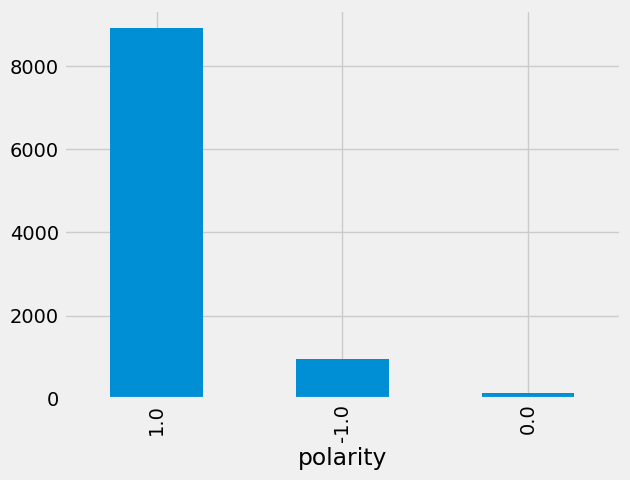

In [17]:
df.polarity.value_counts().plot.bar()
df.polarity.value_counts()

# 4. Analyse Descriptive

<Axes: >

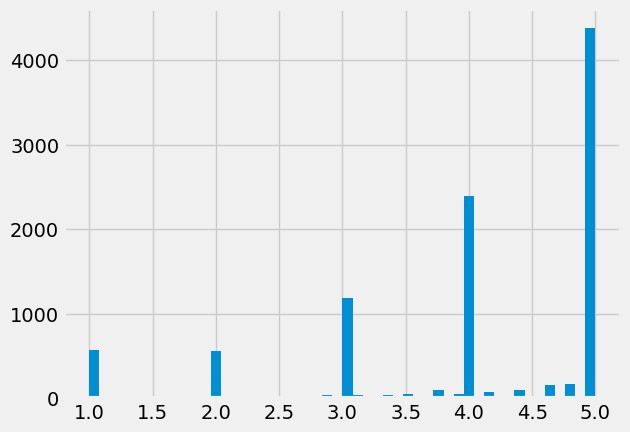

In [19]:
df['reviews.rating'].hist(bins=50)

## 4.1. Distribution de polarité et de subjectivité

<Axes: >

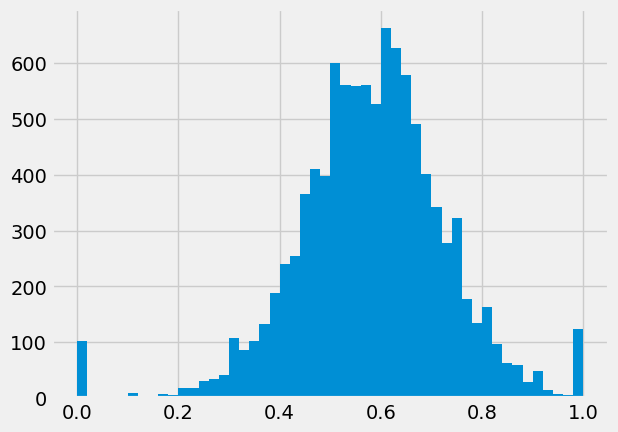

In [21]:
df.subjectivity.hist(bins=50)

<Axes: >

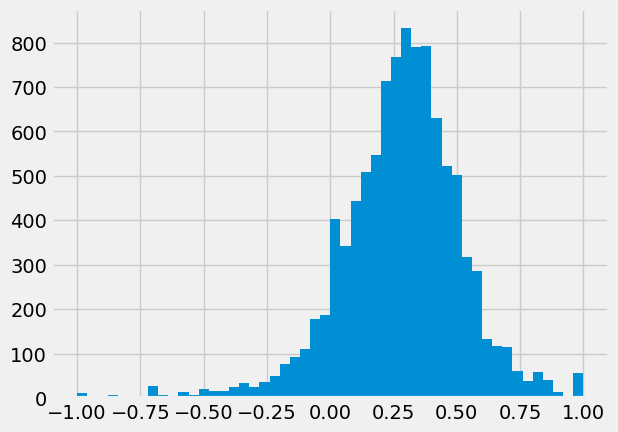

In [22]:
df.polarity.hist(bins=50)

## 4.2. pourcentage des commentaires pour chaque Services

In [15]:
categories_to_modify = [
    'Healthcare & Social Assistance,Accommodation & Food Services',
    'Accommodation & Food Services,Arts Entertainment & Recreation',
    'Wholesale Trade,Accommodation & Food Services'
]

# Fonction pour suprimer le segment repeter dans chaque service (primaryCategories)
def remove_repeated_segment(category):
    if category in categories_to_modify:
        # supprimer 'Accommodation & Food Services,' et ',Accommodation & Food Services' dans les noms des services
        return category.replace('Accommodation & Food Services,', '').replace(',Accommodation & Food Services', '')
    else:
        return category
    
# application du fonction
df['primaryCategories'] = df['primaryCategories'].apply(remove_repeated_segment)

df['primaryCategories'].unique()

array(['Accommodation & Food Services', 'Healthcare & Social Assistance',
       'Arts Entertainment & Recreation', 'Wholesale Trade', 'Utilities'],
      dtype=object)

In [16]:
# Pivot table creation remains the same
pivot_df = df.pivot_table(index='primaryCategories', columns='polarity', aggfunc='size', fill_value=0)

# Reset index to make 'primaryCategories' a column again
pivot_df.reset_index(inplace=True)

# Rename columns for clarity
pivot_df.columns.name = None
pivot_df.rename(columns={0: 'Neutral', 1: 'Positive', -1: 'Negative'}, inplace=True)

# Calculate percentages for Neutral, Positive, and Negative sentiments
pivot_df['Total'] = pivot_df[['Neutral', 'Positive', 'Negative']].sum(axis=1)
pivot_df['Neutral %'] = pivot_df['Neutral'] / pivot_df['Total'] * 100
pivot_df['Positive %'] = pivot_df['Positive'] / pivot_df['Total'] * 100
pivot_df['Negative %'] = pivot_df['Negative'] / pivot_df['Total'] * 100

# Filter for relevant columns
relevant_columns = ['primaryCategories', 'Neutral %', 'Positive %', 'Negative %']

# Plotting
fig = px.bar(pivot_df[relevant_columns], x='primaryCategories', y=[col for col in relevant_columns if col!= 'primaryCategories'],
             title='Percentage Distribution of Sentiments Across Categories',
             labels={'value':'Percentage (%)'},
             barmode='group')

fig.show()
